<span style="color: red;">
<div style="text-align: center;">
  <h1>Machine Learning Project </h1>
</div>
</span>


# Q1. Problem Statement 

- **Context and Company Background:** TechWorks Consulting is an IT talent recruitment company known for its unique approach to connecting skilled IT professionals with job opportunities. They focus on matching the right candidates with the right roles.

- **Data Description:** The dataset we have includes information about colleges, cities, job roles, previous experience, and salaries. We’ll use this data to train and test our predictive model.

- **Regression Task:** Our main goal is to build a regression model that can predict salaries based on the provided data. We’re specifically looking to forecast the salary of newly hired employees.

- **Role of Statistics:** Statistics will help us build the model and evaluate its accuracy. We'll use statistical methods to ensure our model is both reliable and effective.

- **Data Preprocessing:** Data preprocessing is a critical step in our project. It involves handling missing values, addressing outliers, converting categorical variables to numerical formats, normalizing data, and selecting the most relevant features. These steps are essential to prepare the data for building an accurate model.


# Q2. Creating a Salary Prediction Model: A Step-by-Step 

- **Understanding the Data:**
  - Begin by getting familiar with the dataset, including its structure and the meaning behind each column. Examine the data’s distribution, summary statistics, and identify any potential outliers.

- **Preparing the Data:**
  - **Handle Missing Values:** Check for any missing data and decide whether to fill in the gaps or remove incomplete entries to ensure the dataset is complete.
  - **Detect and Treat Outliers:** Identify any outliers that could skew the results and address them appropriately to maintain model accuracy.
  - **Convert Categorical Data:** Transform categorical variables, such as "College" and "City," into numerical formats to make them usable by the model.
  - **Normalize Data:** Scale numerical features to bring them to a similar level, preventing any single feature from having too much influence over the model.
  - **Select Features:** Use techniques like Lasso, Ridge, or correlation analysis to select the most relevant features for predicting salaries.

- **Exploring the Data:**
  - Perform Exploratory Data Analysis (EDA) to uncover patterns, trends, and insights that can guide model development.

- **Choosing the Right Model:**
  - Experiment with various regression models, such as Linear Regression and Multi Linear Regression, to determine which ones perform best for predicting salaries.

- **Training and Evaluating the Model:**
  - Split the dataset into training and testing sets. Train the models on the training data and evaluate their performance on the testing data.
  - Measure model performance using metrics like Mean Squared Error (MSE), R-squared, and Mean Absolute Error (MAE). Experiment with different model parameters and use cross-validation to ensure robustness and avoid overfitting.

- **Comparing Models:**
  - Compare the performance of different models and select the one that offers the best accuracy and generalization.

- **Improving the Model:**
  - Explore additional techniques for model enhancement, such as feature engineering, hyperparameter tuning, and using ensemble methods to boost performance.


# Q3. The Available ML Model Options for This Task

In predicting employee salaries at TechWorks Consulting, several machine learning models are available for regression tasks. The choice of model depends on factors such as the nature of the data, the complexity of the problem, and the need for model interpretability. Here’s a look at the model options:

**1. Linear Regression:**
- Linear regression is a straightforward and interpretable model that assumes a linear relationship between the features and the target variable (salary). It’s a great starting point and helps establish a baseline for performance.

**2. Ridge Regression and Lasso Regression:**
- Ridge and Lasso regression are regularization techniques used to handle multicollinearity and prevent overfitting. They are variations of linear regression that add regularization terms to the cost function to improve model robustness.

**3. Decision Trees:**
- Decision tree-based models, such as Random Forest and Gradient Boosting, are excellent for capturing non-linear relationships in the data. They can handle both numerical and categorical features and automatically determine feature importance.

**4. K-Nearest Neighbors (KNN):**
- KNN is a non-parametric method that makes predictions based on the average of the 'k' nearest data points. It works well for small to medium-sized datasets and is relatively simple to implement.

**5. Polynomial Regression:**
- Polynomial regression introduces polynomial features to capture non-linear relationships between the features and the target variable.

#### For this task, only 3 out of these 5 models will be used. The models will be tested with default parameters, and some will be adjusted with parameter changes to see how they affect performance.


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Optional: To display all columns of dataframes
pd.set_option('display.max_columns', None)

In [7]:
# Load datasets
cities = pd.read_csv("C:\\Users\\ADMIN\\Desktop\\Final Pro\\cities.csv")
college = pd.read_csv("C:\\Users\\ADMIN\Desktop\\Final Pro\\Colleges.csv")
df = pd.read_csv("C:\\Users\\ADMIN\Desktop\\Final Pro\\ML case Study.csv")




In [8]:
# Overview of Data

df.head()


,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10


In [9]:
# Overview of City data

cities.head()

,Metrio City,non-metro cities
0,Mumbai,Dehradun
1,Delhi,Durgapur
2,Kolkata,Asansol
3,Chennai,Rourkela
4,Bangalore,Kozhikode


In [10]:
# Overview of College data

college.head()

,Tier 1,Tier 2,Tier 3
0,IIT Bombay,IIIT Bangalore,"Ramaiah Institute of Technology, Bengaluru"
1,IIT Delhi,IIIT Delhi,TIET/Thapar University
2,IIT Kharagpur,IGDTUW,Manipal Main Campus
3,IIT Madras,NIT Calicut,VIT Vellore
4,IIT Kanpur,IIITM Gwalior,SRM Main Campus


In [11]:
# Extract data from the "Tier 1," "Tier 2," and "Tier 3" columns of the 'college' DataSet
# and store them in separate lists 'Tier1,' 'Tier2,' and 'Tier3' for next process.

Tier1 = college["Tier 1"].tolist()
Tier2 = college["Tier 2"].tolist()
Tier3 = college["Tier 3"].tolist()

In [12]:
# Printing data contains in Tier1 Dataset

Tier1

['IIT Bombay',
 'IIT Delhi',
 'IIT Kharagpur',
 'IIT Madras',
 'IIT Kanpur',
 'IIT Roorkee',
 'IIT Guwahati',
 'IIIT Hyderabad',
 'BITS Pilani (Pilani Campus)',
 'IIT Indore',
 'IIT Ropar',
 'IIT BHU (Varanasi)',
 'IIT ISM Dhanbad',
 'DTU',
 'NSUT Delhi (NSIT)',
 'NIT Tiruchipally (Trichy)',
 'NIT Warangal',
 'NIT Surathkal (Karnataka)',
 'Jadavpur University',
 'BITS Pilani (Hyderabad Campus)',
 'BITS Pilani (Goa Campus)',
 'IIIT Allahabad',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

In [13]:
# Assign tier values to colleges in the DataSet based on their tier catagories
#  If a college is in'Tier1', setting its value to 3 -
#  If a college is in'Tier2', setting its value to 2-
#  If a college is in'Tier3', setting its value to 1-
# Rankwise Numbering Is Done Here

for item in df.College:
    if item in Tier1:
        df["College"].replace(item,3,inplace=True)
    elif item in Tier2:
        df["College"].replace(item,2,inplace=True)
    elif item in Tier3:
        df["College"].replace(item,1,inplace=True)

In [14]:
# checking the changes in dataset
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,2,Asansol,Manager,55523.0,3,66,19,71406.58
1,2,Ajmer,Executive,57081.0,1,84,18,68005.87
2,1,Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,1,Ajmer,Executive,49010.0,2,81,33,82092.39
4,3,Durgapur,Executive,57879.0,4,74,32,73878.10


In [15]:
# Extracting lists of metro and non-metro cities from the 'cities' DataSet

metro = cities['Metrio City'].tolist()
non_metro_cities = cities['non-metro cities'].tolist()

In [16]:
# Repeating previous steps and assigning value as 1 if city is merto and 0 if non metro city

for item in df.City:
    if item in metro:
        df['City'].replace(item,1,inplace=True)
    elif item in non_metro_cities:
        df['City'].replace(item,0,inplace=True)

In [17]:
# Checking changes in the dataset
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,2,0,Manager,55523.0,3,66,19,71406.58
1,2,0,Executive,57081.0,1,84,18,68005.87
2,1,0,Executive,60347.0,2,52,28,76764.02
3,1,0,Executive,49010.0,2,81,33,82092.39
4,3,0,Executive,57879.0,4,74,32,73878.10


In [18]:
# need to Convert Categorical column 'Role' into numerical
df = pd.get_dummies(df, drop_first=True

In [20]:
df.sample(8)

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
927,3,1,45588.0,2,81,57,66422.09,False
1557,3,0,44261.0,4,64,24,75535.50,False
694,1,0,62261.0,4,39,27,59214.25,False
835,3,1,58049.0,2,51,42,65084.43,False
1369,3,0,50011.0,2,72,18,69764.49,False
499,1,1,64187.0,4,39,62,67432.59,False
1346,2,1,53124.0,4,40,37,70083.30,False
1182,2,0,57135.0,2,62,25,61164.74,False


#### Missing Values

In [21]:
# Checking missing values in data,this is very importanat task

df.isna().sum()

College                0
City                   0
Previous CTC           0
Previous job change    0
Graduation Marks       0
EXP (Month)            0
CTC                    0
Role_Manager           0
dtype: int64

##### Statistical Information About Numerical Data

In [23]:
# Statistical information about numerical data we have

df.describe()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,2.024544,0.514160,55518.453744,2.528634,59.855255,39.044682,75353.278798
std,0.838330,0.499957,6655.218445,1.123918,14.935139,14.108875,12587.288237
min,1.000000,0.000000,36990.000000,1.000000,35.000000,18.000000,53020.320000
25%,1.000000,0.000000,50518.000000,2.000000,46.000000,26.000000,66902.350000
50%,2.000000,1.000000,55291.000000,3.000000,60.000000,39.000000,73028.670000
75%,3.000000,1.000000,60109.000000,4.000000,73.000000,51.000000,80588.670000
max,3.000000,1.000000,77911.000000,4.000000,85.000000,64.000000,123416.990000


##### Information Of Data And It's Type

In [22]:
# Information about data, includes datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   int64  
 1   City                 1589 non-null   int64  
 2   Previous CTC         1589 non-null   float64
 3   Previous job change  1589 non-null   int64  
 4   Graduation Marks     1589 non-null   int64  
 5   EXP (Month)          1589 non-null   int64  
 6   CTC                  1589 non-null   float64
 7   Role_Manager         1589 non-null   bool   
dtypes: bool(1), float64(2), int64(5)
memory usage: 88.6 KB


* ##  Visualizations Used In Data Preprocessing
### Detection of Outliers

<Axes: >

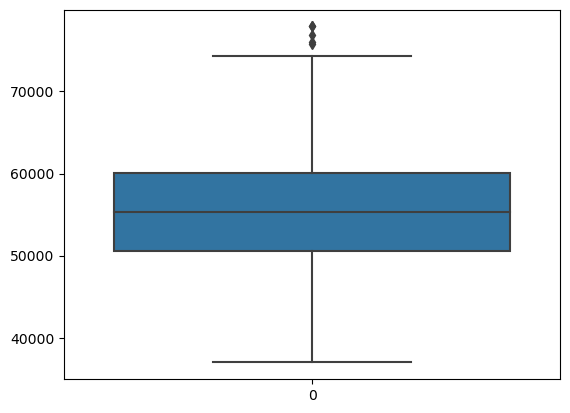

In [71]:
# Using seaborn library to plot box plot for detection of outliers
sns.boxplot(df['Previous CTC'])

<Axes: >

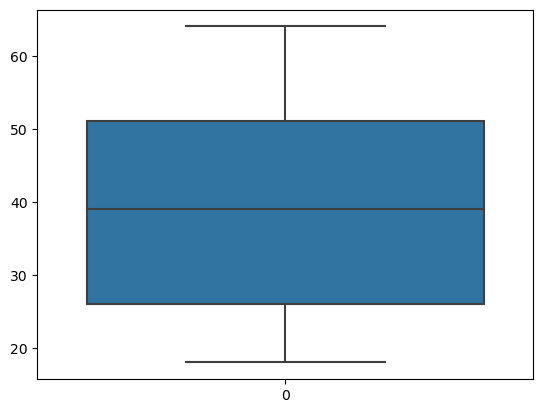

In [25]:
sns.boxplot(df['EXP (Month)'])

<Axes: >

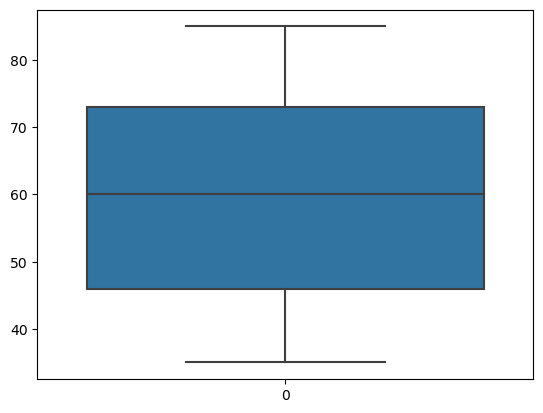

In [26]:
sns.boxplot(df['Graduation Marks'])

<Axes: >

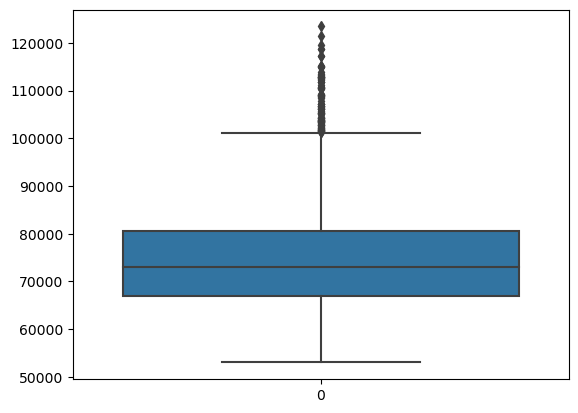

In [27]:
sns.boxplot(df['CTC'])

In [28]:
# Correlation between variables
corr = df.corr()
corr

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
College,1.000000,0.014946,-0.041979,0.055060,-0.003539,-0.011752,0.029592,0.014749
City,0.014946,1.000000,0.004644,0.051670,-0.018616,-0.023613,-0.020365,-0.048671
Previous CTC,-0.041979,0.004644,1.000000,0.005756,-0.032976,0.119163,0.258000,0.012321
Previous job change,0.055060,0.051670,0.005756,1.000000,0.019267,0.023488,0.011370,-0.017150
Graduation Marks,-0.003539,-0.018616,-0.032976,0.019267,1.000000,-0.057061,-0.005450,0.017858
EXP (Month),-0.011752,-0.023613,0.119163,0.023488,-0.057061,1.000000,0.301115,-0.026751
CTC,0.029592,-0.020365,0.258000,0.011370,-0.005450,0.301115,1.000000,0.621311
Role_Manager,0.014749,-0.048671,0.012321,-0.017150,0.017858,-0.026751,0.621311,1.000000


<Axes: >

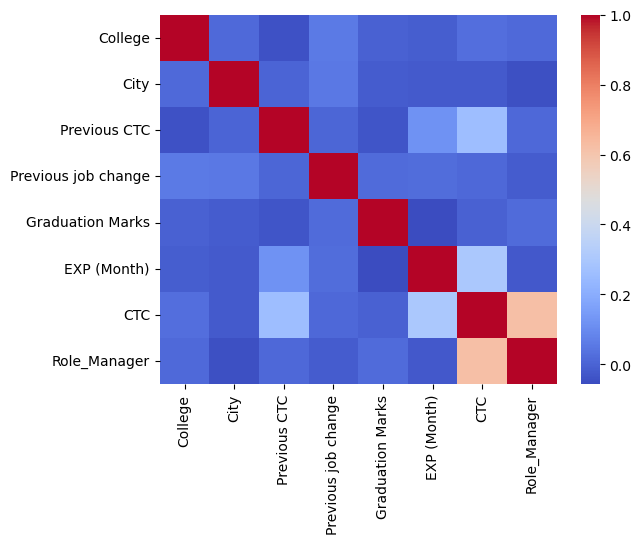

In [32]:
# Visual representation of correlation
# Heatmap
sns.heatmap(data=corr,cmap='coolwarm')

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

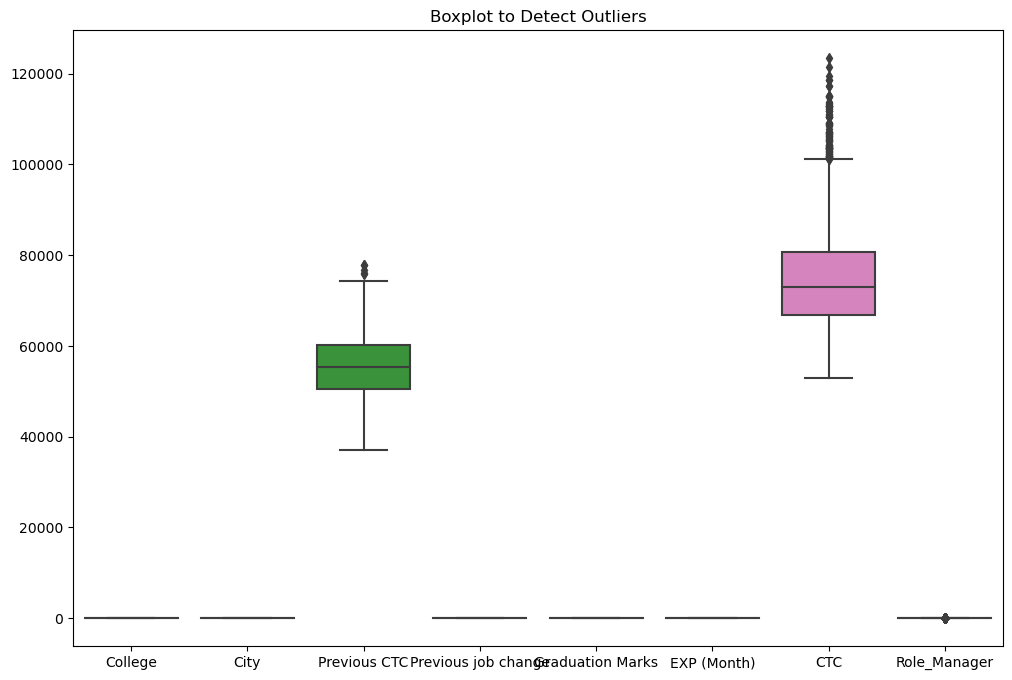

In [35]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.title('Boxplot to Detect Outliers')
plt.show()
# 2nd way to show outliers

#### Outliers present in CTC column

In [37]:
percent25 = df['Previous CTC'].quantile(0.25)
percent75 = df['Previous CTC'].quantile(0.75)

In [40]:
iqr = percent75-percent25

In [39]:
upper_limit = percent75 + 1.5*iqr
lower_limit = percent25 - 1.5*iqr

In [41]:
df[(df['Previous CTC'] < lower_limit) | (df['Previous CTC'] > upper_limit)]

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
116,1,1,77911.0,1,50,58,87831.62,False
860,3,1,75785.0,4,63,37,110338.25,True
1088,1,1,76815.0,4,75,52,82684.17,False
1317,3,0,76070.0,2,54,18,58309.56,False
1454,3,1,77911.0,1,50,58,87831.62,False


###### In the above DataFrame, These are outliers present in "Previous CTC"column. As seen these outliers are not extreme, so in my opinion keeping these data may not affect much on my model.

In [43]:
percent25 = df['CTC'].quantile(0.25)
percent75 = df['CTC'].quantile(0.75)

In [44]:
iqr = percent75-percent25

In [45]:
upper_limit = percent75 + 1.5*iqr
lower_limit = percent25 - 1.5*iqr

In [46]:
df[(df['CTC'] < lower_limit) | (df['CTC'] > upper_limit)]

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
14,1,0,66487.0,1,50,27,103595.83,True
29,2,0,65172.0,1,44,31,107138.14,True
30,3,0,58529.0,1,65,22,102763.61,True
34,3,0,60894.0,4,80,28,118651.89,True
38,2,0,57485.0,1,77,35,103774.34,True
...,...,...,...,...,...,...,...,...
1447,1,0,59099.0,2,67,63,103305.30,True
1461,3,0,55440.0,4,72,44,112826.26,True
1513,1,0,58639.0,2,46,63,109108.12,True
1523,2,1,70258.0,4,38,36,115126.75,True


###### As seen above, these are some outliers in "CTC" column but they are not as extreme that can make any huge difference while making prediction. Therefore in my opinion keeping those outliers into data is more useful than removing.




## Conclusion on Detection of Outliers:
 
 
 * No Significant Outliers: Analysis of the data indicates that there aren't any extreme outliers likely to drastically impact the machine learning model's performance. The summary from the describe() function confirms that the data is fairly clean in this regard.
 
 
 * Previous CTC and CTC Outliers: Although there are a few outliers in the "Previous CTC" and "CTC" columns, these outliers are considered part of the natural variability of the data and are not expected to negatively affect the model. In fact, they might provide valuable information for predictions.


 * Correlation Insights: The heatmap reveals some interesting relationships, particularly between Role_manager and CTC, as well as between Previous CTC and CTC. These correlations could be significant predictors of salary and are worth considering in the model.

## Running Machine Learning Models Without Feature Scaling-

In [61]:
# Import necessary libraries for data splitting, modeling, and evaluation

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

# Import Random Forest from sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV


#### Split Data Into Training And Testing Sets

In [48]:
# Split data into dependent and Independent Variable

X = df.loc[:, df.columns != 'CTC']
y = df['CTC']

In [49]:
# Split Data into train and test with test_size = 0.2(80% data into train and 20% to test)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [50]:
y_test

1079     74059.06
405      84692.16
1492     75028.75
239      71001.53
610      62426.39
          ...    
1023     67435.46
700      62927.79
486      75143.25
672      60479.67
1303    105077.70
Name: CTC, Length: 318, dtype: float64

#### Linear Regression Model

In [51]:
# LinearRegression model
linear_reg = LinearRegression()

# Fit the model to the training data
linear_reg.fit(X_train, y_train)

# Make predictions on the test data
linear_reg_pred = linear_reg.predict(X_test)

# Calculate and print the R-squared (r2) score
print("r2_score:",r2_score(y_test, linear_reg_pred))

# Calculate and print the Mean Absolute Error (MAE)
print("MAE:", mean_absolute_error(y_test, linear_reg_pred))

# Calculate and print the Mean Squared Error (MSE)
print("MSE:", mean_squared_error(y_test, linear_reg_pred))

print()

# Print the coefficients of the linear regression model
print("Coef:",linear_reg.coef_)

# Print the intercept of the linear regression model
print("Intercept:",linear_reg.intercept_)

r2_score: 0.5933517958385095
MAE: 7191.23106750003
MSE: 77362774.9495653

Coef: [5.17509158e+02 4.82800374e+02 4.22242899e-01 8.74331790e+00
 1.94023127e+00 2.43718541e+02 1.86020838e+04]
Intercept: 37159.52949669529


#### Ridge Regression Model

In [53]:
# Import the Ridge regression model
ridge = Ridge()

# Fit the model to training data
ridge.fit(X_train, y_train)

# Make prediction on test data
ridge_predict = ridge.predict(X_test)

# Calculate and print the R-squared (r2) score
print("r2_score:",r2_score(y_test, ridge_predict))

# Calculate and print the Mean Absolute Error (MAE)
print("MAE:", mean_absolute_error(y_test, ridge_predict))

# Calculate and print the Mean Squared Error (MSE)
print("MSE:", mean_squared_error(y_test, ridge_predict))

print()

# Print the coefficients of the linear regression model
print("Coef:",ridge.coef_)

# Print the intercept of the linear regression model
print("Intercept:",ridge.intercept_)

r2_score: 0.5926580862926116
MAE: 7198.215276305912
MSE: 77494749.70054282

Coef: [5.16821192e+02 4.76920014e+02 4.22312444e-01 7.76895529e+00
 1.98601422e+00 2.43648895e+02 1.85111317e+04]
Intercept: 37180.93708654535


#### Ridge Regression Model With A Specified Alpha Value

In [55]:
# Create a Ridge regression model with a specified alpha value and solver
ridge_tuned = Ridge(alpha=0.3, solver='cholesky')

# Fit the Ridge model to the training data
ridge_tuned.fit(X_train, y_train)

# Make predictions on the test data using the tuned Ridge model
ridge_predict_tuned = ridge.predict(X_test)

# Calculate and print the R-squared (r2) score to evaluate model performance
print("r2_score:",r2_score(y_test, ridge_predict_tuned))

# Calculate and print the Mean Absolute Error (MAE) to measure prediction accuracy
print("MAE:", mean_absolute_error(y_test, ridge_predict_tuned))

# Calculate and print the Mean Squared Error (MSE) to assess prediction accuracy
print("MSE:", mean_squared_error(y_test, ridge_predict_tuned))

print()

# Print the coefficients of the linear regression model
print("Coef:",ridge_tuned.coef_)

# Print the intercept of the linear regression model
print("Intercept:",ridge_tuned.intercept_)

r2_score: 0.5926580862926116
MAE: 7198.215276305912
MSE: 77494749.70054282

Coef: [5.17302519e+02 4.81027864e+02 4.22263836e-01 8.44992996e+00
 1.95401218e+00 2.43697575e+02 1.85747043e+04]
Intercept: 37165.974309073834


#### Lasso Regression

In [54]:
# Create Lasso regression with default parameters

lasso = Lasso()

# Fit model with train data
lasso.fit(X_train, y_train)

# Make prediction on test data
lasso_pred = lasso.predict(X_test)

# Calculate and print the R-squared (r2) score to evaluate model performance
print("r2_score:",r2_score(y_test, lasso_pred))

# Calculate and print the Mean Absolute Error (MAE) to measure prediction accuracy
print("MAE:", mean_absolute_error(y_test, lasso_pred))

# Calculate and print the Mean Squared Error (MSE) to assess prediction accuracy
print("MSE:", mean_squared_error(y_test, lasso_pred))

print()

# Print the coefficients of the linear regression model
print("Coef:",lasso.coef_)

# Print the intercept of the linear regression model
print("Intercept:",lasso.intercept_)

r2_score: 0.5933030911807144
MAE: 7191.7094203244
MSE: 77372040.76567228

Coef: [5.16164197e+02 4.78595253e+02 4.22241674e-01 8.05923215e+00
 1.93522068e+00 2.43703723e+02 1.85954658e+04]
Intercept: 37168.432177131945


#### Lasso Regression Model With Alpha Value

In [56]:
# Create Lasso regression with alpha value
lasso_tuned = Lasso(alpha=0.3)

# Fit the model on train data
lasso_tuned.fit(X_train, y_train)

# Prediction on test data
lasso_tuned_pred = lasso_tuned.predict(X_test)

# Calculate and print the R-squared (r2) score to evaluate model performance
print("r2_score:",r2_score(y_test, lasso_tuned_pred))

# Calculate and print the mean absolute error(MSE) score to evaluate model performance
print("MAE:", mean_absolute_error(y_test, lasso_tuned_pred))

# Calculate and print the Mean Squared Error (MSE) to assess prediction accuracy
print("MSE:", mean_squared_error(y_test, lasso_tuned_pred))

r2_score: 0.5933372007824145
MAE: 7191.374573405911
MSE: 77365551.58555806


 #### DecisionTreeRegressor Model

In [60]:
# Create a DecisionTreeRegressor model
dtr = DecisionTreeRegressor()

# Train the model using the training data
dtr.fit(X_train, y_train)

# Train the model using the training data
dtr_pred = dtr.predict(X_test)

# Calculate and print the R-squared (r2) score to evaluate model performance
print("r2_score:",r2_score(y_test, dtr_pred))

# Calculate and print the mean absolute error(MSE) score to evaluate model performance
print("MAE:", mean_absolute_error(y_test, dtr_pred))

# Calculate and print the Mean Squared Error (MSE) to evaluate prediction errors
print("MSE:", mean_squared_error(y_test, dtr_pred))

r2_score: 0.3246898332595467
MAE: 8368.60254716981
MSE: 128474361.66212043


#### Random Forest Regression Model

In [62]:
# Create Random forest regression on default parameters
rnd = RandomForestRegressor()

# Fit model on train data
rnd.fit(X_train, y_train)

# Make prediction on test data
rnd_pred = rnd.predict(X_test)

# Calculate and print the R-squared (r2) score to evaluate model performance
print("r2_score:",r2_score(y_test, rnd_pred))

# Calculate and print the mean absolute error(MSE) score to evaluate model performance
print("MAE:", mean_absolute_error(y_test, rnd_pred))

# Calculate and print the Mean Squared Error (MSE) to evaluate prediction errors
print("MSE:", mean_squared_error(y_test, rnd_pred))

r2_score: 0.6454858465976178
MAE: 6265.506445283019
MSE: 67444534.08482905


#### Random Forest regression with tuned parameters

In [64]:
# To get better preformnace , creating model with tuned parameters
# Create Random Forest regression with tuned parameters
rnd_tuned = RandomForestRegressor(n_jobs=-1, max_features=5, min_samples_split=3)

# Fit model on train data
rnd_tuned.fit(X_train, y_train)

# Make prediction on test data
rnd_tuned_pred = rnd_tuned.predict(X_test)

# Calculate and print the R-squared (r2) score to evaluate model performance
print("r2_score:",r2_score(y_test, rnd_tuned_pred))

# Calculate and print the mean absolute error(MSE) score to evaluate model performance
print("MAE:", mean_absolute_error(y_test, rnd_tuned_pred))

# Calculate and print the Mean Squared Error (MSE) to evaluate prediction errors
print("MSE:", mean_squared_error(y_test, rnd_tuned_pred))

r2_score: 0.6415701247402137
MAE: 6347.4630952991165
MSE: 68189480.46776979


##### Evaluating The Performance

In [65]:
# Parameters
params_grid = {"max_features": [4,5,6,7,8,9,10],
              "min_samples_split": [2,3,10]}

In [66]:
# Find best parameter for model
grid_search = GridSearchCV(rnd_tuned, params_grid, n_jobs=-1, cv=5)

In [68]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_features=5,
                                             min_samples_split=3, n_jobs=-1),
             n_jobs=-1,
             param_grid={'max_features': [4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 10]})

In [69]:
# Best parameters
grid_search.best_params_

{'max_features': 4, 'min_samples_split': 3}

## Running Machine Learning Model performance with test size = 0.1

#### Split Data Into Training And Testing Sets

In [72]:
# Split Data into train and test with test_size = 0.1(90% data into train and 10% to test)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

#### Linear Regression Model 

In [75]:
# create Linear regression model with test size = 0.1
linear_reg = LinearRegression()

# Fit model with train data
linear_reg.fit(X_train, y_train)

# Prediction using test data
linear_reg_pred = linear_reg.predict(X_test)

# Calculate and print the R-squared (r2) score to evaluate model performance
print("r2_score:",r2_score(y_test, linear_reg_pred))

# Calculate and print the mean absolute error(MSE) score to evaluate model performance
print("MAE:", mean_absolute_error(y_test, linear_reg_pred))

# Calculate and print the Mean Squared Error (MSE) to evaluate prediction errors
print("MSE:", mean_squared_error(y_test, linear_reg_pred))

print()

# Print the coefficients of the linear regression model
print("Coef:",linear_reg.coef_)

# Print the intercept of the linear regression model
print("Intercept:",linear_reg.intercept_)

r2_score: 0.636321685246418
MAE: 7264.595222184898
MSE: 75992712.22135599

Coef: [4.42911803e+02 5.25765245e+02 4.08212376e-01 9.22873354e+01
 2.31517208e+00 2.51617523e+02 1.89309912e+04]
Intercept: 37413.57369634283


#### Ridge Regression Model 

In [76]:
# Create Ridge regression with test size = 0.1
ridge = Ridge()

# Fit model with train data
ridge.fit(X_train, y_train)

# Prediction using test data
ridge_predict = ridge.predict(X_test)

# Calculate and print the R-squared (r2) score to evaluate model performance
print("r2_score:",r2_score(y_test, ridge_predict))

# Calculate and print the mean absolute error(MSE) score to evaluate model performance
print("MAE:", mean_absolute_error(y_test, ridge_predict))

# Calculate and print the Mean Squared Error (MSE) to evaluate prediction errors
print("MSE:", mean_squared_error(y_test, ridge_predict))

print()

# Print the coefficients of the linear regression model
print("Coef:",ridge.coef_)

# Print the intercept of the linear regression model
print("Intercept:",ridge.intercept_)

r2_score: 0.635607919174224
MAE: 7273.60749691774
MSE: 76141857.81931214

Coef: [4.42864404e+02 5.20710813e+02 4.08256354e-01 9.19186306e+01
 2.35030487e+00 2.51556414e+02 1.88488104e+04]
Intercept: 37431.67335348472


#### Ridge Regression Model With Alpha Value

In [77]:
# Create Ridge regression model with alpha = 0.3 and sover = cholesky
ridge_tuned = Ridge(alpha=0.3, solver='cholesky')

# Fit model with train data
ridge_tuned.fit(X_train, y_train)

# Prediction using test data
ridge_predict_tuned = ridge.predict(X_test)

# Calculate and print the R-squared (r2) score to evaluate model performance
print("r2_score:",r2_score(y_test, ridge_predict_tuned))

# Calculate and print the mean absolute error(MSE) score to evaluate model performance
print("MAE:", mean_absolute_error(y_test, ridge_predict_tuned))

# Calculate and print the Mean Squared Error (MSE) to evaluate prediction errors
print("MSE:", mean_squared_error(y_test, ridge_predict_tuned))

print()

# Print the coefficients of the linear regression model
print("Coef:",ridge_tuned.coef_)

# Print the intercept of the linear regression model
print("Intercept:",ridge_tuned.intercept_)

r2_score: 0.635607919174224
MAE: 7273.60749691774
MSE: 76141857.81931214

Coef: [4.42897940e+02 5.24242646e+02 4.08225611e-01 9.21764079e+01
 2.32574303e+00 2.51599134e+02 1.89062616e+04]
Intercept: 37419.02017641857


#### Lasso Regression Model With Default Parameters

In [78]:
# Create Lasso regression model with default parameters
lasso = Lasso()

# Fit model on train data
lasso.fit(X_train, y_train)

# Prediction on test data
lasso_pred = lasso.predict(X_test)

# Calculate and print the R-squared (r2) score to evaluate model performance
print("r2_score:",r2_score(y_test, lasso_pred))

# Calculate and print the mean absolute error(MSE) score to evaluate model performance
print("MAE:", mean_absolute_error(y_test, lasso_pred))

# Calculate and print the Mean Squared Error (MSE) to evaluate prediction errors
print("MSE:", mean_squared_error(y_test, lasso_pred))

print()

# Print the coefficients of the linear regression model
print("Coef:",lasso.coef_)

# Print the intercept of the linear regression model
print("Intercept:",lasso.intercept_)

r2_score: 0.6362725365808042
MAE: 7265.304096193648
MSE: 76002982.12266861

Coef: [4.41583747e+02 5.21553553e+02 4.08206824e-01 9.16362699e+01
 2.30982336e+00 2.51603269e+02 1.89244902e+04]
Intercept: 37422.56964438998


#### Lasso Regression Model With Tuned Parameter

In [79]:
# Create Lasso regression model with tuned parameter
lasso_tuned = Lasso(alpha=0.3)

# Fit model on train data
lasso_tuned.fit(X_train, y_train)

# Prediction on test data
lasso_tuned_pred = lasso_tuned.predict(X_test)

# Calculate and print the R-squared (r2) score to evaluate model performance
print("r2_score:",r2_score(y_test, lasso_tuned_pred))

# Calculate and print the mean absolute error(MSE) score to evaluate model performance
print("MAE:", mean_absolute_error(y_test, lasso_tuned_pred))

# Calculate and print the Mean Squared Error (MSE) to evaluate prediction errors
print("MSE:", mean_squared_error(y_test, lasso_tuned_pred))

r2_score: 0.6363069568715122
MAE: 7264.807871629203
MSE: 75995789.80148739


#### Decision Tree Regression Model


In [80]:
# Create Decision tree regression with default parameters
dtr = DecisionTreeRegressor()

# Fit model on train data
dtr.fit(X_train, y_train)

# Prediction on test data
dtr_pred = dtr.predict(X_test)

# Calculate and print the R-squared (r2) score to evaluate model performance
print("r2_score:",r2_score(y_test, dtr_pred))

# Calculate and print the mean absolute error(MSE) score to evaluate model performance
print("MAE:", mean_absolute_error(y_test, dtr_pred))

# Calculate and print the Mean Squared Error (MSE) to evaluate prediction errors
print("MSE:", mean_squared_error(y_test, dtr_pred))

r2_score: 0.4548846441682135
MAE: 6964.911383647798
MSE: 113905043.77814023


#### DecisionTreeRegressor Model With Tuned Parameter

In [81]:
# Create DecisionTreeRegressor model with tuned parameter
dtr_tuned = DecisionTreeRegressor(max_depth=4)

# Fit model on train data
dtr_tuned.fit(X_train, y_train)

# Prediction using test data
dtr_tuned_pred = dtr_tuned.predict(X_test)

# Calculate and print the R-squared (r2) score to evaluate model performance
print("r2_score:",r2_score(y_test, dtr_tuned_pred))

# Calculate and print the mean absolute error(MSE) score to evaluate model performance
print("MAE:", mean_absolute_error(y_test, dtr_tuned_pred))

# Calculate and print the Mean Squared Error (MSE) to evaluate prediction errors
print("MSE:", mean_squared_error(y_test, dtr_tuned_pred))

r2_score: 0.6302592573081193
MAE: 7013.4869288702985
MSE: 77259492.01819375


#### Random Forest Regressor Model

In [82]:
# Create Random forest regressor model on default parameters
rnd = RandomForestRegressor()

#Fit model on train data
rnd.fit(X_train, y_train)

# prediction using test data
rnd_pred = rnd.predict(X_test)

# Calculate and print the R-squared (r2) score to evaluate model performance
print("r2_score:",r2_score(y_test, rnd_pred))

# Calculate and print the mean absolute error(MSE) score to evaluate model performance
print("MAE:", mean_absolute_error(y_test, rnd_pred))

# Calculate and print the Mean Squared Error (MSE) to evaluate prediction errors
print("MSE:", mean_squared_error(y_test, rnd_pred))

r2_score: 0.6708307096456481
MAE: 6555.654893710693
MSE: 68781849.61606885


#### Random Forest Regressor Model With Max Features

In [83]:
# Create Random forest regressor model with max features = 5 and min sample split = 3
rnd_tuned = RandomForestRegressor(n_jobs=-1, max_features=5, min_samples_split=3)

# Fit model using train data
rnd_tuned.fit(X_train, y_train)

# Prediction using test data
rnd_tuned_pred = rnd_tuned.predict(X_test)

# Calculate and print the R-squared (r2) score to evaluate model performance
print("r2_score:",r2_score(y_test, rnd_tuned_pred))

# Calculate and print the mean absolute error(MSE) score to evaluate model performance
print("MAE:", mean_absolute_error(y_test, rnd_tuned_pred))

# Calculate and print the Mean Squared Error (MSE) to evaluate prediction errors
print("MSE:", mean_squared_error(y_test, rnd_tuned_pred))

r2_score: 0.6832970839533041
MAE: 6442.3186504759415
MSE: 66176927.74755628


## Performing Feature 

In [84]:
# Split data into independent and target variable
X = df.loc[:, df.columns != 'CTC']
y = df['CTC']

In [85]:
# Split Data into train and test with test_size = 0.2(80% data into train and 20% to test)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [86]:
# Import Standard scaler from sklearn for feature scaling(mean=0, std dev=1)
from sklearn.preprocessing import StandardScaler

In [87]:
# Create standard scaler object
scaler = StandardScaler()

In [88]:
# Scale the features in the training data using a previously fitted scaler
X_train_scaled = scaler.fit_transform(X_train)

# Scale the features in the test data using the same scaler to ensure consistency
X_test_scaled = scaler.transform(X_test)

In [89]:
# Storing otput of X_train_scaled into dataframe for checking change done on values after scaling
df_X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
df_X_test = pd.DataFrame(X_test_scaled, columns = X_test.columns)

In [90]:
# Statistical changes sfter scaling
np.round(df_X_train.describe(), 1)

# Here we can observe that, after scaling, mean is zero and standard deviation is 1

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),Role_Manager
count,1271.0,1271.0,1271.0,1271.0,1271.0,1271.0,1271.0
mean,-0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-1.2,-1.0,-2.8,-1.4,-1.7,-1.5,-0.5
25%,-1.2,-1.0,-0.8,-0.5,-0.9,-0.9,-0.5
50%,-0.0,1.0,-0.0,0.4,0.0,-0.0,-0.5
75%,1.2,1.0,0.7,1.3,0.9,0.9,-0.5
max,1.2,1.0,3.4,1.3,1.7,1.7,2.0


## Checking Model Performance After Scaling With Test Size 0.2

#### Linear Regression Model


In [91]:
# Create LinearRegression model with scaled data and test size 0.2
lr_scaled = LinearRegression()

# Fit model on train data
lr_scaled.fit(X_train_scaled, y_train)

# Make prediction using test data
lr_scaled_pred = lr_scaled.predict(X_test_scaled)

# Calculate and print the R-squared (r2) score to evaluate model performance
print("r2_score:",r2_score(y_test, lr_scaled_pred))

# Calculate and print the mean absolute error(MSE) score to evaluate model performance
print("MAE:", mean_absolute_error(y_test, lr_scaled_pred))

# Calculate and print the Mean Squared Error (MSE) to evaluate prediction errors
print("MSE:", mean_squared_error(y_test, lr_scaled_pred))

print()

# Print the coefficients of the linear regression model
print("Coef:",lr_scaled.coef_)

# Print the intercept of the linear regression model
print("Intercept:",lr_scaled.intercept_)

r2_score: 0.5933517958385082
MAE: 7191.231067500048
MSE: 77362774.94956557

Coef: [ 435.09743711  241.31880694 2802.97570998    9.81979783   29.0192253
 3467.75304336 7471.39306988]
Intercept: 75284.838245476


#### Ridge Regressor Model

In [92]:
# Create Ridge regressor after feature scaling with test size 0.2
r_scaled = Ridge()

# Fit model using train data
r_scaled.fit(X_train_scaled, y_train)

# Make prediction on test data
r_scaled_pred = r_scaled.predict(X_test_scaled)

# Calculate and print the R-squared (r2) score to evaluate model performance
print("r2_score:",r2_score(y_test, r_scaled_pred))

# Calculate and print the mean absolute error(MSE) score to evaluate model performance
print("MAE:", mean_absolute_error(y_test, r_scaled_pred))

# Calculate and print the Mean Squared Error (MSE) to evaluate prediction errors
print("MSE:", mean_squared_error(y_test, r_scaled_pred))

r2_score: 0.5932150226490303
MAE: 7192.604677281892
MSE: 77388795.36074269


#### Lasso Regressor Model

In [93]:
# Create Lasso regressor model after feature scaling and test size 0.2
l_scaled = Lasso()

# Fit model on train data
l_scaled.fit(X_train_scaled, y_train)

# Make prediction using test data
l_scaled_pred = l_scaled.predict(X_test_scaled)

# Calculate and print the R-squared (r2) score to evaluate model performance
print("r2_score:",r2_score(y_test, l_scaled_pred))

# Calculate and print the mean absolute error(MSE) score to evaluate model performance
print("MAE:", mean_absolute_error(y_test, l_scaled_pred))

# Calculate and print the Mean Squared Error (MSE) to evaluate prediction errors
print("MSE:", mean_squared_error(y_test, l_scaled_pred))

r2_score: 0.5933169519706637
MAE: 7191.560845403443
MSE: 77369403.82011962


#### Decision Tree Regression Model

In [94]:
# Create Decision Tree regression after feature scaling with test size of 0.2
dt_scaled = DecisionTreeRegressor()

# Fit model on train data
dt_scaled.fit(X_train_scaled, y_train)

# Make prediction using test data
dt_scaled_pred = dt_scaled.predict(X_test_scaled)

# Calculate and print the R-squared (r2) score to evaluate model performance
print("r2_score:",r2_score(y_test, dt_scaled_pred))

# Calculate and print the mean absolute error(MSE) score to evaluate model performance
print("MAE:", mean_absolute_error(y_test, dt_scaled_pred))

# Calculate and print the Mean Squared Error (MSE) to evaluate prediction errors
print("MSE:", mean_squared_error(y_test, dt_scaled_pred))

r2_score: 0.3169418447735133
MAE: 8296.539811320754
MSE: 129948377.49059999


#### Random Forest Regressor Model

In [95]:
# Create Random Forest regressor model on default parameter after feature scaling with test size 0.2
rf_scaled = RandomForestRegressor()

# Fit model on train data
rf_scaled.fit(X_train_scaled, y_train)

# Prediction using test data
rf_scaled_pred = rf_scaled.predict(X_test_scaled)

# Calculate and print the R-squared (r2) score to evaluate model performance
print("r2_score:",r2_score(y_test, rf_scaled_pred))

# Calculate and print the mean absolute error(MSE) score to evaluate model performance
print("MAE:", mean_absolute_error(y_test, rf_scaled_pred))

# Calculate and print the Mean Squared Error (MSE) to evaluate prediction errors
print("MSE:", mean_squared_error(y_test, rf_scaled_pred))

r2_score: 0.6359160313882743
MAE: 6368.995153773585
MSE: 69265143.2816063


#### Random Forest Model With Tuned Parameters


In [96]:
# Create Random Forest model after feature scaling with parameter tuned
rf_scaled_tuned = RandomForestRegressor(max_features=5, min_samples_split=3, n_jobs=-1)

# Fit model on train data
rf_scaled_tuned.fit(X_train_scaled, y_train)

# Prediction on test data
rf_scaled_tuned_pred = rf_scaled_tuned.predict(X_test_scaled)

# Calculate and print the R-squared (r2) score to evaluate model performance
print("r2_score:",r2_score(y_test, rf_scaled_tuned_pred))

# Calculate and print the mean absolute error(MSE) score to evaluate model performance
print("MAE:", mean_absolute_error(y_test, rf_scaled_tuned_pred))

# Calculate and print the Mean Squared Error (MSE) to evaluate prediction errors
print("MSE:", mean_squared_error(y_test, rf_scaled_tuned_pred))

r2_score: 0.6417049648813692
MAE: 6348.821225637416
MSE: 68163827.80931063


# Model Performance Comparison

We compared the performance of different machine learning models using the R-squared (`r2_score`) metric as the primary measure, along with Mean Absolute Error (MAE) and Mean Squared Error (MSE) for reference.

## Scenario 1: Test Size = 20% (without feature scaling)
- **Linear Regression:** `R-squared = 0.5934`
- **Ridge Regression:** `R-squared = 0.5927`
- **Lasso Regression:** `R-squared = 0.5933`
- **Decision Tree:** `R-squared = 0.3161`
- **Random Forest:** `R-squared = 0.6312`

## Scenario 2: Test Size = 10% (without feature scaling)
- **Linear Regression:** `R-squared = 0.6363`
- **Ridge Regression:** `R-squared = 0.6356`
- **Lasso Regression:** `R-squared = 0.6363`
- **Decision Tree:** `R-squared = 0.4423`
- **Random Forest:** `R-squared = 0.6720`

## Scenario 3: Test Size = 10% (with feature scaling)
- **Linear Regression:** `R-squared = 0.6363`
- **Ridge Regression:** `R-squared = 0.6362`
- **Lasso Regression:** `R-squared = 0.6363`
- **Decision Tree:** `R-squared = 0.4657`
- **Random Forest:** `R-squared = 0.6745`

## Scenario 4: Test Size = 20% (with feature scaling)
- **Linear Regression:** `R-squared = 0.5934`
- **Ridge Regression:** `R-squared = 0.5932`
- **Lasso Regression:** `R-squared = 0.5933`
- **Decision Tree:** `R-squared = 0.2732`
- **Random Forest:** `R-squared = 0.6397`

## Key Takeaways
- **Random Forest** consistently outperforms the other models in all scenarios, particularly after scaling the features.
- **Linear, Ridge, and Lasso Regression** models show very similar performance, with minor differences in R-squared values.
- **Decision Tree** tends to underperform relative to the other models, especially with a larger test size and after scaling.
- **Feature Scaling** slightly improves the performance of Random Forest and Decision Tree models but has little impact on the regression models.


## Q4. Summary 

When comparing the different models, **Random Forest** stands out as the most reliable performer across all scenarios, whether feature scaling is applied or not, and regardless of the test size. It consistently achieves the highest R-squared scores, indicating a strong fit to the data.

**Linear Regression** and **Lasso** also deliver solid results, but they fall just short of Random Forest in terms of R-squared scores. They still perform well, making them good options depending on your specific needs.

On the other hand, the **Decision Tree** model struggles the most, showing the lowest R-squared scores across the board. It consistently lags behind the other models, making it the weakest option in these comparisons.

**Feature scaling** does seem to help improve model performance, especially in scenarios where it was applied. The models generally achieved higher R-squared scores with scaled features compared to those without scaling.

In conclusion, if you're prioritizing R-squared as your main measure of success, **Random Forest** is the clear winner, followed by **Linear Regression** and **Lasso**. However, it's important to also weigh other factors like how easy the model is to interpret, how much computational power it requires, and what exactly you're trying to achieve with your analysis when deciding on the best model for your project.


## Q5. Steps To Enhance Model Performance

To further boost the performance of the chosen model, several strategies can be applied:

1. **Increase the Number of Trees (Estimators):** Random Forest models often perform better when more decision trees are included in the ensemble. Adding more trees can help capture more patterns in the data.

2. **Hyperparameter Tuning:** A more detailed hyperparameter tuning process can be very beneficial. Experimenting with different values for key parameters, such as `max_depth`, `min_samples_split`, `min_samples_leaf`, and `max_features`, can help optimize the model. Tools like Grid Search or Randomized Search are useful in finding the best combination of these hyperparameters.

3. **Feature Selection:** Not all features contribute equally to the model’s performance. By identifying and removing or down-weighting less informative features, you can make the model more efficient and potentially improve its accuracy.
